# Import

In [241]:
import pandas as pd
# reading in the resturant reviews into a pandas data frame.
train_df=pd.read_csv(r'C:\Users\Morga\programsMG\TextMining\kaggle-sentiment\train.tsv',sep='\t',encoding="utf8")
test_df=pd.read_csv(r'C:\Users\Morga\programsMG\TextMining\kaggle-sentiment\test.tsv',sep='\t',encoding="utf8")

In [242]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [243]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [244]:
#checking the counts of the labels
#this is for when the full data set is used ie cross validation
print(train_df['Sentiment'].value_counts())
print('baseline:',79582/sum(train_df['Sentiment'].value_counts()))

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64
baseline: 0.5099448929898757


In [245]:
#seperating the label
y=train_df['Sentiment'].values
X=train_df['Phrase'].values

z=test_df['Phrase'].values
kaggle_ids=test_df['PhraseId'].values

# Splitting data

In [246]:
#selecting 40% of the data for testing  and 60% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(93636,) (93636,) (62424,) (62424,)


In [247]:
#first makding sure all labels are present
training_labels = set(y_train)
print(training_labels)

from scipy.stats import itemfreq
import numpy as np
#finding the distribution of training examples
training_category_dist = np.unique(y_train,return_counts=True)
print(training_category_dist)

{0, 1, 2, 3, 4}
(array([0, 1, 2, 3, 4], dtype=int64), array([ 4141, 16449, 47718, 19859,  5469], dtype=int64))


In [248]:
#finding the baseline for the trianing data
training_category_dist
print(47718/sum(training_category_dist[1]))

0.5096116878123799


# Unigram SVM vs MNB

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

In [250]:
# fitting and transforming the training data using the count vectorizer
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)

In [251]:
# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_tfidf_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(unigram_tfidf_vectorizer.vocabulary_.items())[:10])

# check word index in vocabulary
print(unigram_tfidf_vectorizer.vocabulary_.get('imaginative'))

(93636, 11967)
[[0. 0. 0. ... 0. 0. 0.]]
11967
[('class', 1858), ('wilde', 11742), ('derring', 2802), ('chilling', 1764), ('affecting', 313), ('meanspirited', 6557), ('personal', 7662), ('low', 6296), ('involved', 5602), ('worth', 11868)]
5224


In [252]:
#transforming the test data
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)

In [253]:
# print out #examples and #features in the test set
print(X_test_vec.shape)

(62424, 11967)


In [254]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm1 = LinearSVC(C=1)

# use the training data to train the model
svm_model_1 = svm1.fit(X_train_vec,y_train)

In [255]:
#creating a sorted list of the prediction % and the name of the predictor
svm_feature_ranks_vneg = sorted(zip(svm_model_1.coef_[0],
                                    unigram_tfidf_vectorizer.get_feature_names_out()))

## get the 10 features that are best indicators of very negative sentiment
very_negative_10 = svm_feature_ranks_vneg[-10:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

Very negative words
(2.0987486765277623, 'stinks')
(2.1727352677511806, 'worthless')
(2.1798391121166207, 'worst')
(2.1800503432633844, 'distasteful')
(2.2009526617484823, 'unwatchable')
(2.2123807540258205, 'unbearable')
(2.2381371549861666, 'meaningless')
(2.4621467389342637, 'stinker')
(2.544275438894272, 'disappointment')
(2.563483044797518, 'disgusting')



In [256]:
#creating a sorted list of the prediction % and the name of the predictor
svm_feature_ranks_vpos = sorted(zip(svm_model_1.coef_[4],
                                    unigram_tfidf_vectorizer.get_feature_names_out()))

## get the 10 features that are best indicators of very negative sentiment
very_positive_10 = svm_feature_ranks_vpos[-10:]
print("Very positive words")
for i in range(0, len(very_positive_10)):
    print(very_positive_10[i])
print()

Very positive words
(2.2486583109949567, 'phenomenal')
(2.2841704847963906, 'masterpiece')
(2.3433874811387083, 'magnificent')
(2.352451497767898, 'stunning')
(2.3544754249629247, 'miraculous')
(2.3737036811267394, 'masterfully')
(2.376400287683998, 'glorious')
(2.381288829157662, 'masterful')
(2.390827555909225, 'zings')
(2.4682237186376157, 'perfection')



In [257]:
from sklearn.naive_bayes import MultinomialNB

#selecting the multinomial naive bayes classifier
mnb1 = MultinomialNB()

#creating the model
mnb_model_1=mnb1.fit(X_train_vec,y_train)

In [258]:
#creating a sorted list of the prediction % and the name of the predictor
mnb_feature_ranks_vneg = sorted(zip(mnb_model_1.feature_log_prob_[0]
                                    , unigram_tfidf_vectorizer.get_feature_names_out()))

## get the 10 features that are best indicators of very negative sentiment
mnb_very_negative_10 = mnb_feature_ranks_vneg[-10:]
print("Very negative words")
for i in range(0, len(mnb_very_negative_10)):
    print(mnb_very_negative_10[i])
print()

Very negative words
(-6.645979011120781, 'time')
(-6.62020923362483, 'does')
(-6.60369986228579, 'minutes')
(-6.517311233308192, 'dull')
(-6.355845020937053, 'just')
(-6.131355008437069, 'worst')
(-6.029810232070883, 'like')
(-5.792621365210278, 'film')
(-5.411480448479903, 'bad')
(-5.186697744581525, 'movie')



In [259]:
#creating a sorted list of the prediction % and the name of the predictor
mnb_feature_ranks_vpos = sorted(zip(mnb_model_1.feature_log_prob_[4]
                                    , unigram_tfidf_vectorizer.get_feature_names_out()))

## get the 10 features that are best indicators of very negative sentiment
mnb_very_positive_10 = mnb_feature_ranks_vpos[-10:]
print("Very positive words")

for i in range(0, len(mnb_very_positive_10)):
    print(mnb_very_positive_10[i])
print()

Very positive words
(-6.296148399433598, 'fun')
(-6.1660714027789965, 'entertaining')
(-6.123845477949642, 'performance')
(-6.038969240779541, 'performances')
(-5.946467095414271, 'great')
(-5.809197749822911, 'good')
(-5.652790662920261, 'funny')
(-5.485414582781967, 'movie')
(-5.444930328141257, 'best')
(-5.060214745410679, 'film')



In [260]:
vp = []
for num , token in mnb_very_positive_10:
    x=(np.exp(1)**num)*100
    vp.append({x:token})
    
print(vp)

[{0.18433911276839005: 'fun'}, {0.2099467783547813: 'entertaining'}, {0.21900180833516075: 'performance'}, {0.2384014993021937: 'performances'}, {0.26150629857818486: 'great'}, {0.2999835725971175: 'good'}, {0.3507714255402517: 'funny'}, {0.4146815524542517: 'movie'}, {0.43181408500521723: 'best'}, {0.6344196979429668: 'film'}]


In [261]:
# test the classifier on the test data set, print accuracy score

svm_model_1.score(X_test_vec,y_test)

0.6254325259515571

In [262]:
# print confusion matrix and classification report

from sklearn.metrics import confusion_matrix
y_pred = svm_model_1.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred, target_names=target_names))

[[  795  1387   624   117     8]
 [  589  4336  5245   629    25]
 [  163  2299 26557  2684   161]
 [   24   408  5604  6220   812]
 [    2    40   551  2010  1134]]

              precision    recall  f1-score   support

           0       0.51      0.27      0.35      2931
           1       0.51      0.40      0.45     10824
           2       0.69      0.83      0.75     31864
           3       0.53      0.48      0.50     13068
           4       0.53      0.30      0.39      3737

    accuracy                           0.63     62424
   macro avg       0.55      0.46      0.49     62424
weighted avg       0.61      0.63      0.61     62424



In [263]:
# test the classifier on the test data set, print accuracy score

mnb_model_1.score(X_test_vec,y_test)

0.5836056644880174

In [264]:
# print confusion matrix and classification report

from sklearn.metrics import confusion_matrix
mnb_y_pred = mnb_model_1.predict(X_test_vec)
mnb_cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
print(mnb_cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, mnb_y_pred, target_names=target_names))

[[  795  1387   624   117     8]
 [  589  4336  5245   629    25]
 [  163  2299 26557  2684   161]
 [   24   408  5604  6220   812]
 [    2    40   551  2010  1134]]

              precision    recall  f1-score   support

           0       0.57      0.04      0.07      2931
           1       0.51      0.24      0.33     10824
           2       0.60      0.90      0.72     31864
           3       0.52      0.37      0.43     13068
           4       0.62      0.05      0.09      3737

    accuracy                           0.58     62424
   macro avg       0.57      0.32      0.33     62424
weighted avg       0.57      0.58      0.53     62424



In [265]:
# lists of dicts of scores
unimetics=         {'Very Negative\nuni SVM precision':0.51,'Very Negative\nuni MNB precision':0.57
                   ,'Very Negative\nuni SVM recall':0.27,'Very Negative\nuni MNB recall':0.04
                   ,'Very Negative\nuni SVM f1-score':0.35,'Very Negative\nuni MNB f1-score':0.07
                   ,'Somewhat Negative\nuni SVM precision':0.51,'Somewhat Negative\nuni MNB precision':0.51
                   ,'Somewhat Negative\nuni SVM recall':0.40,'Somewhat Negative\nuni MNB recall':0.24
                   ,'Somewhat Negative\nuni SVM f1-score':0.45,'Somewhat Negative\nuni MNB f1-score':0.33
                   ,'Neutral\nuni SVM precision':0.69,'Neutral\nuni MNB precision':0.60
                   ,'Neutral\nuni SVM recall':0.83,'Neutral\nuni MNB recall':0.90
                   ,'Neutral\nuni SVM f1-score':0.75,'Neutral\nuni MNB f1-score':0.72
                   ,'Somewhat Positive\nuni SVM precision':0.53,'Somewhat Positive\nuni MNB precision':0.52
                   ,'Somewhat Positive\nuni SVM recall':0.48,'Somewhat Positive\nuni MNB recall':0.37
                   ,'Somewhat Positive\nuni SVM f1-score':0.50,'Somewhat Positive\nuni MNB f1-score':0.43
                   ,'Very Positive\nuni SVM precision':0.53,'Very Positive\nuni MNB precision':0.62
                   ,'Very Positive\nuni SVM recall':0.30,'Very Positive\nuni MNB recall':0.05
                   ,'Very Positive\nuni SVM f1-score':0.39,'Very Positive\nuni MNB f1-score':0.09}

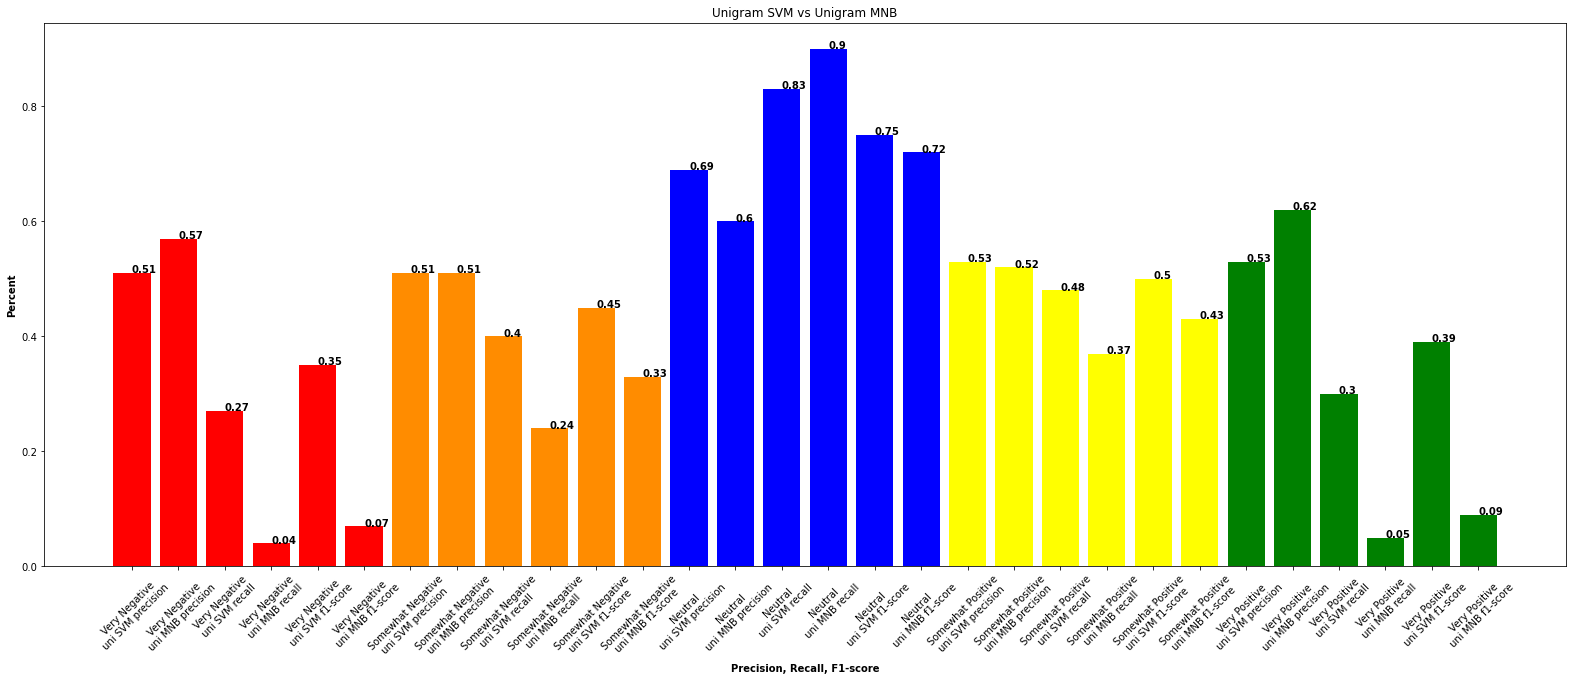

In [317]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(unimetics.values())
names = list(unimetics.keys())
colors = ['red','red','red','red','red','red',
          'darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
          'blue','blue','blue','blue','blue','blue',
          'yellow','yellow','yellow','yellow','yellow','yellow',
          'green','green','green','green','green','green']
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Precision, Recall, F1-score')
plt.title('Unigram SVM vs Unigram MNB')

addlabels(values)
plt.show()

# unigram and bigram SVM vs MNB

In [267]:
gram12_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', ngram_range=(1,2),use_idf=True, min_df=5, stop_words='english')

In [268]:
# fitting and transforming the training data using the count vectorizer
X_train_vec_bi = gram12_tfidf_vectorizer.fit_transform(X_train)

In [269]:
# check the content of a document vector
print(X_train_vec_bi.shape)
print(X_train_vec_bi[0].toarray())

# check the size of the constructed vocabulary
print(len(gram12_tfidf_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(gram12_tfidf_vectorizer.vocabulary_.items())[:10])

# check word index in vocabulary
print(unigram_tfidf_vectorizer.vocabulary_.get('imaginative'))

(93636, 34579)
[[0. 0. 0. ... 0. 0. 0.]]
34579
[('class', 5020), ('wilde', 33787), ('derring', 7552), ('chilling', 4755), ('affecting', 825), ('meanspirited', 19199), ('personal', 22506), ('low', 18281), ('involved', 15905), ('worth', 34261)]
5224


In [270]:
#transforming the test data
X_test_vec_bi = gram12_tfidf_vectorizer.transform(X_test)

In [271]:
# print out #examples and #features in the test set
print(X_test_vec_bi.shape)

(62424, 34579)


In [272]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm2 = LinearSVC(C=1)

# use the training data to train the model
svm_model_2 = svm2.fit(X_train_vec_bi,y_train)

In [273]:
#creating a sorted list of the prediction % and the name of the predictor
svm_bi_feature_ranks_vneg = sorted(zip(svm_model_2.coef_[0],
                                       gram12_tfidf_vectorizer.get_feature_names_out()))

## get the 10 features that are best indicators of very negative sentiment
bi_very_negative_10 = svm_bi_feature_ranks_vneg[-10:]
print("Very negative words")
for i in range(0, len(bi_very_negative_10)):
    print(bi_very_negative_10[i])
print()

Very negative words
(2.08876175332494, 'awful')
(2.1120434357159588, 'unwatchable')
(2.1290855179644756, 'unbearable')
(2.1416340420994997, 'entirely witless')
(2.1674522560992577, 'distasteful')
(2.274550897684777, 'disgusting')
(2.310962603060975, 'garbage')
(2.326885350848144, 'charm laughs')
(2.4427297160242487, 'waste')
(2.682396375773295, 'disappointment')



In [274]:
from sklearn.naive_bayes import MultinomialNB

#selecting the multinomial naive bayes classifier
mnb2 = MultinomialNB()

#creating the model
mnb_model_2=mnb2.fit(X_train_vec_bi,y_train)

In [275]:
#creating a sorted list of the prediction % and the name of the predictor
mnb_bi_feature_ranks_vneg = sorted(zip(mnb_model_2.feature_log_prob_[0]
                                       , gram12_tfidf_vectorizer.get_feature_names_out()))

## get the 10 features that are best indicators of very negative sentiment
mnb_bi_very_negative_10 = mnb_bi_feature_ranks_vneg[-164:]
print("Very negative words")
for i in range(0, len(mnb_bi_very_negative_10)):
    print(mnb_bi_very_negative_10[i])
print()

Very negative words
(-8.748854374970367, 'worst movie')
(-8.74749785717736, 'tired')
(-8.745323985686078, 'come')
(-8.744610145043316, 'laughs')
(-8.743442831796804, 'man')
(-8.741137294596538, 'meandering')
(-8.740432557914145, 'stinker')
(-8.736430218656373, 'badly')
(-8.733719787539355, 'utterly')
(-8.729700963765348, 'soap')
(-8.726484102821093, 'amateurish')
(-8.72323992808648, 'lacking')
(-8.715547208073842, 'vulgar')
(-8.713214650044575, 'just plain')
(-8.713128806549545, 'films')
(-8.711397031026337, 'poor')
(-8.70841037068509, 'soap opera')
(-8.699193183119906, 'unfocused')
(-8.694258745589893, 'drama')
(-8.692713686529729, 'head')
(-8.69189658224195, 'deadly')
(-8.690046653687904, 'depressing')
(-8.689129759332708, 'horribly')
(-8.687699202134166, 'barely')
(-8.683344626817004, 'funny')
(-8.680344497012648, 'opera')
(-8.68014780987122, 'kind')
(-8.672028047268132, 'mindless')
(-8.65610260518125, 'impossible')
(-8.653668266822319, 'trash')
(-8.651893071466754, 'work')
(-8.6510

In [276]:
# test the classifier on the test data set, print accuracy score

svm_model_2.score(X_test_vec_bi,y_test)

0.6301262334999359

In [277]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.51      0.27      0.35      2931
           1       0.51      0.40      0.45     10824
           2       0.69      0.83      0.75     31864
           3       0.53      0.48      0.50     13068
           4       0.53      0.30      0.39      3737

    accuracy                           0.63     62424
   macro avg       0.55      0.46      0.49     62424
weighted avg       0.61      0.63      0.61     62424



In [278]:
# print confusion matrix and classification report

from sklearn.metrics import confusion_matrix
y_pred_svm_bi = svm_model_2.predict(X_test_vec_bi)
cm_svm_bi=confusion_matrix(y_test, y_pred_svm_bi, labels=[0,1,2,3,4])
print(cm_svm_bi)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred_svm_bi, target_names=target_names))

[[  916  1373   565    69     8]
 [  696  4666  4947   493    22]
 [  217  2507 26156  2827   157]
 [   25   364  5343  6334  1002]
 [    5    32   475  1962  1263]]

              precision    recall  f1-score   support

           0       0.49      0.31      0.38      2931
           1       0.52      0.43      0.47     10824
           2       0.70      0.82      0.75     31864
           3       0.54      0.48      0.51     13068
           4       0.52      0.34      0.41      3737

    accuracy                           0.63     62424
   macro avg       0.55      0.48      0.51     62424
weighted avg       0.61      0.63      0.62     62424



In [279]:
# test the classifier on the test data set, print accuracy score

mnb_model_2.score(X_test_vec_bi,y_test)

0.5948993976675637

In [280]:
print(classification_report(y_test, mnb_y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.57      0.04      0.07      2931
           1       0.51      0.24      0.33     10824
           2       0.60      0.90      0.72     31864
           3       0.52      0.37      0.43     13068
           4       0.62      0.05      0.09      3737

    accuracy                           0.58     62424
   macro avg       0.57      0.32      0.33     62424
weighted avg       0.57      0.58      0.53     62424



In [281]:
# print confusion matrix and classification report

from sklearn.metrics import confusion_matrix
mnb_bi_y_pred = mnb_model_2.predict(X_test_vec_bi)
mnb_bi_cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
print(mnb_bi_cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, mnb_bi_y_pred, target_names=target_names))

[[  795  1387   624   117     8]
 [  589  4336  5245   629    25]
 [  163  2299 26557  2684   161]
 [   24   408  5604  6220   812]
 [    2    40   551  2010  1134]]

              precision    recall  f1-score   support

           0       0.65      0.06      0.11      2931
           1       0.53      0.26      0.35     10824
           2       0.61      0.90      0.73     31864
           3       0.54      0.39      0.45     13068
           4       0.67      0.07      0.13      3737

    accuracy                           0.59     62424
   macro avg       0.60      0.34      0.36     62424
weighted avg       0.59      0.59      0.54     62424



In [282]:
# lists of dicts of scores
bimetics=           {'Very Negative\nBi and uni MNB precision':0.65,'Very Negative\nBi and uni SVM precision':0.49
                   ,'Very Negative\nBi and uni MNB recall':0.06,'Very Negative\nBi and uni SVM recall':0.31
                   ,'Very Negative\nBi and uni MNB f1-score':0.11,'Very Negative\nBi and uni SVM f1-score':0.38
                   ,'Somewhat Negative\nBi and uni MNB precision':0.53,'Somewhat Negative\nBi and uni SVM precision':0.52
                   ,'Somewhat Negative\nBi and uni MNB recall':0.26,'Somewhat Negative\nBi and uni SVM recall':0.43
                   ,'Somewhat Negative\nBi and uni MNB f1-score':0.35,'Somewhat Negative\nBi and uni SVM f1-score':0.47
                   ,'Neutral\nBi and uni MNB precision':0.61,'Neutral\nBi and uni SVM precision':0.70
                   ,'Neutral\nBi and uni MNB recall':0.90,'Neutral\nBi and uni SVM recall':0.82
                   ,'Neutral\nBi and uni MNB f1-score':0.73,'Neutral\nBi and uni SVM f1-score':0.75
                   ,'Somewhat Positive\nBi and uni MNB precision':0.54,'Somewhat Positive\nBi and uni SVM precision':0.54
                   ,'Somewhat Positive\nBi and uni MNB recall':0.39,'Somewhat Positive\nBi and uni SVM recall':0.48
                   ,'Somewhat Positive\nBi and uni MNB f1-score':0.45,'Somewhat Positive\nBi and uni SVM f1-score':0.51
                   ,'Very Positive\nBi and uni MNB precision':0.67,'Very Positive\nBi and uni SVM precision':0.52
                   ,'Very Positive\nBi and uni MNB recall':0.07,'Very Positive\nBi and uni SVM recall':0.34
                   ,'Very Positive\nBi and uni MNB f1-score':0.13,'Very Positive\nBi and uni SVM f1-score':0.41}

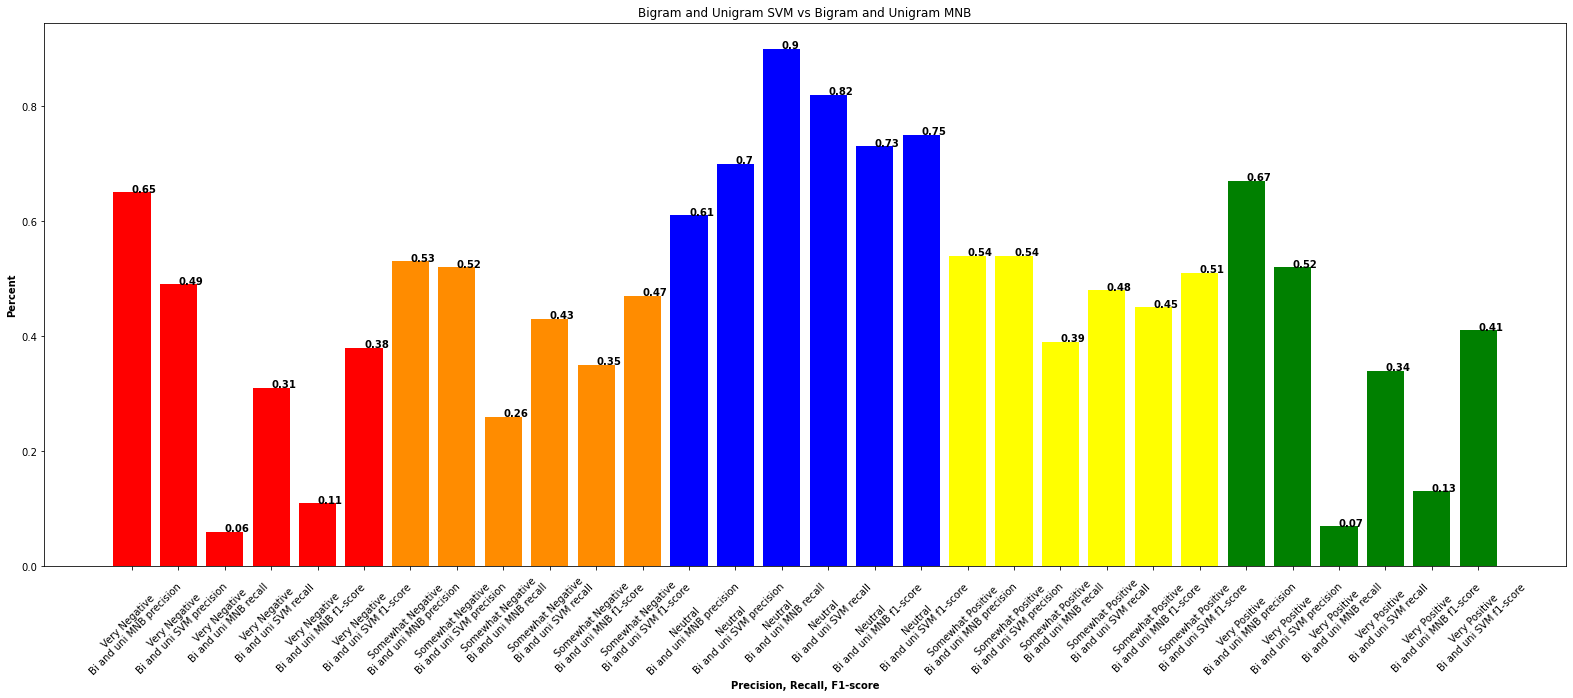

In [318]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(bimetics.values())
names = list(bimetics.keys())
colors = ['red','red','red','red','red','red',
          'darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
          'blue','blue','blue','blue','blue','blue',
          'yellow','yellow','yellow','yellow','yellow','yellow',
          'green','green','green','green','green','green']
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )
plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Precision, Recall, F1-score')
plt.title('Bigram and Unigram SVM vs Bigram and Unigram MNB')
addlabels(values)
plt.show()

# Unigram Stemming SVM vs Bigram and unigram SVM

In [284]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [285]:
from sklearn.feature_extraction.text import TfidfVectorizer
#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer_stem = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english',analyzer=stemmed_words)

In [286]:
# fitting and transforming the training data using the count vectorizer
X_train_vec_stem = unigram_tfidf_vectorizer_stem.fit_transform(X_train)

# check the content of a document vector
print(X_train_vec_stem.shape)
print(X_train_vec_stem[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_tfidf_vectorizer_stem.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(unigram_tfidf_vectorizer_stem.vocabulary_.items())[:10])

# check word index in vocabulary
print(unigram_tfidf_vectorizer_stem.vocabulary_.get('imaginative'))

(93636, 8883)
[[0. 0. 0. ... 0. 0. 0.]]
8883
[('almost', 314), ('in', 3885), ('class', 1447), ('with', 8741), ('that', 7839), ('of', 5372), ('wild', 8701), ('whose', 8689), ('der', 2062), ('do', 2249)]
None


In [287]:
#transforming the test data
X_test_vec_stem = unigram_tfidf_vectorizer_stem.transform(X_test)

# print out #examples and #features in the test set
print(X_test_vec_stem.shape)

(62424, 8883)


In [288]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_stem = LinearSVC(C=1)

# use the training data to train the model
svm_model_stem = svm_stem.fit(X_train_vec_stem,y_train)

In [289]:
# test the classifier on the test data set, print accuracy score

print('stem:',svm_model_stem.score(X_test_vec_stem,y_test))
print('uni:',svm_model_1.score(X_test_vec,y_test))
print('bi:',svm_model_2.score(X_test_vec_bi,y_test))

stem: 0.6298539023452518
uni: 0.6254325259515571
bi: 0.6301262334999359


In [290]:
# print confusion matrix and classification report

from sklearn.metrics import confusion_matrix
y_pred_stem = svm_model_stem.predict(X_test_vec_stem)
cm_stem=confusion_matrix(y_test, y_pred_stem, labels=[0,1,2,3,4])
print(cm_stem)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred_stem, target_names=target_names))

[[  734  1498   598    94     7]
 [  574  4458  5210   558    24]
 [  132  2218 26906  2470   138]
 [   22   448  5700  6137   761]
 [    3    66   531  2054  1083]]

              precision    recall  f1-score   support

           0       0.50      0.25      0.33      2931
           1       0.51      0.41      0.46     10824
           2       0.69      0.84      0.76     31864
           3       0.54      0.47      0.50     13068
           4       0.54      0.29      0.38      3737

    accuracy                           0.63     62424
   macro avg       0.56      0.45      0.49     62424
weighted avg       0.61      0.63      0.61     62424



In [291]:
# non stemmed uni and bi gram
print(classification_report(y_test, y_pred_svm_bi, target_names=target_names))

              precision    recall  f1-score   support

           0       0.49      0.31      0.38      2931
           1       0.52      0.43      0.47     10824
           2       0.70      0.82      0.75     31864
           3       0.54      0.48      0.51     13068
           4       0.52      0.34      0.41      3737

    accuracy                           0.63     62424
   macro avg       0.55      0.48      0.51     62424
weighted avg       0.61      0.63      0.62     62424



In [292]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.51      0.27      0.35      2931
           1       0.51      0.40      0.45     10824
           2       0.69      0.83      0.75     31864
           3       0.53      0.48      0.50     13068
           4       0.53      0.30      0.39      3737

    accuracy                           0.63     62424
   macro avg       0.55      0.46      0.49     62424
weighted avg       0.61      0.63      0.61     62424



In [293]:
# lists of dicts of scores
stembimetics=           {'Very Negative\nStemmed SVM precision':0.50,'Very Negative\nBi and uni SVM precision':0.49
                   ,'Very Negative\nStemmed SVM recall':0.25,'Very Negative\nBi and uni SVM recall':0.31
                   ,'Very Negative\nStemmed SVM f1-score':0.33,'Very Negative\nBi and uni SVM f1-score':0.38
                   ,'Somewhat Negative\nStemmed SVM precision':0.51,'Somewhat Negative\nBi and uni SVM precision':0.52
                   ,'Somewhat Negative\nStemmed SVM recall':0.41,'Somewhat Negative\nBi and uni SVM recall':0.43
                   ,'Somewhat Negative\nStemmed SVM f1-score':0.46,'Somewhat Negative\nBi and uni SVM f1-score':0.47
                   ,'Neutral\nStemmed SVM precision':0.69,'Neutral\nBi and uni SVM precision':0.70
                   ,'Neutral\nStemmed SVM recall':0.84,'Neutral\nBi and uni SVM recall':0.82
                   ,'Neutral\nStemmed SVM f1-score':0.76,'Neutral\nBi and uni SVM f1-score':0.75
                   ,'Somewhat Positive\nStemmed SVM precision':0.54,'Somewhat Positive\nBi and uni SVM precision':0.54
                   ,'Somewhat Positive\nStemmed SVM recall':0.47,'Somewhat Positive\nBi and uni SVM recall':0.48
                   ,'Somewhat Positive\nStemmed SVM f1-score':0.50,'Somewhat Positive\nBi and uni SVM f1-score':0.51
                   ,'Very Positive\nStemmed SVM precision':0.54,'Very Positive\nBi and uni SVM precision':0.52
                   ,'Very Positive\nStemmed SVM recall':0.29,'Very Positive\nBi and uni SVM recall':0.34
                   ,'Very Positive\nStemmed SVM f1-score':0.38,'Very Positive\nBi and uni SVM f1-score':0.41}

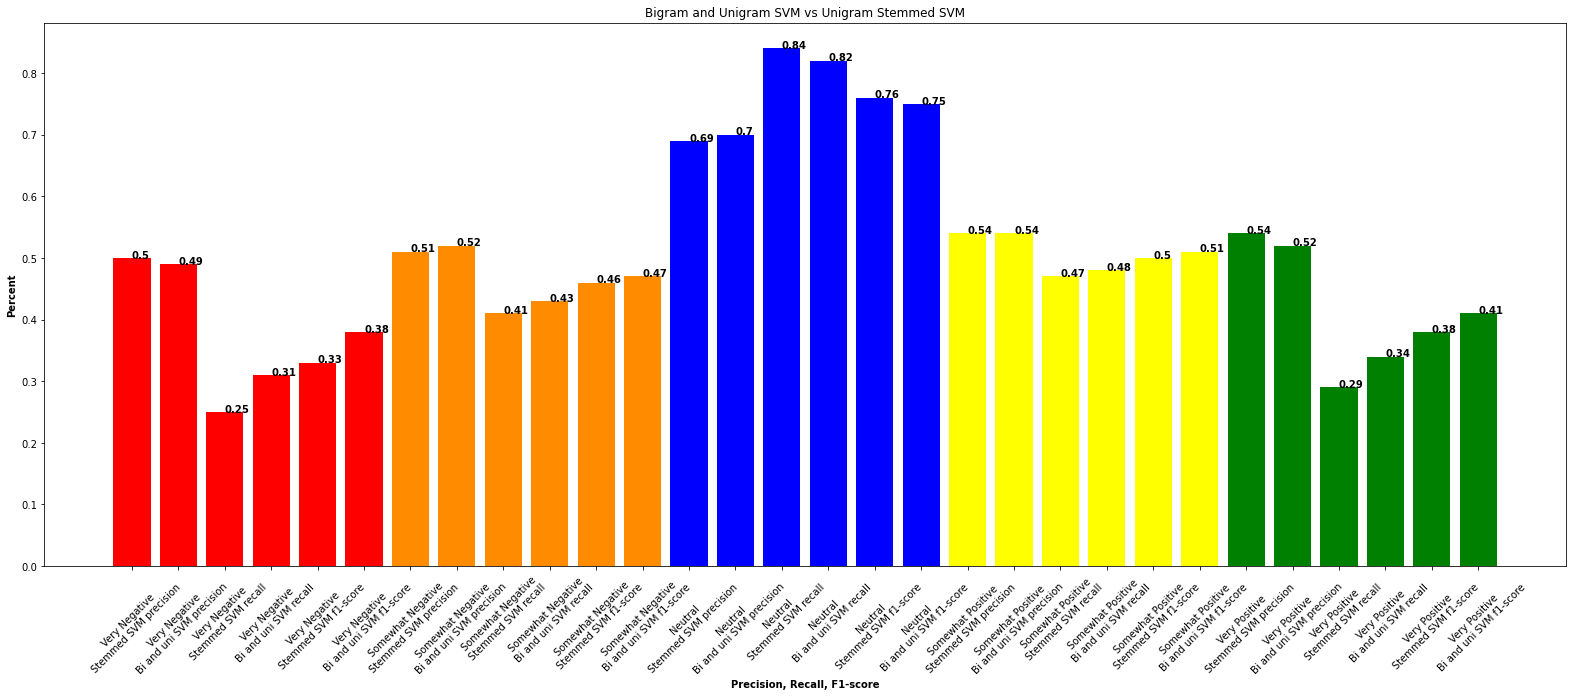

In [319]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(stembimetics.values())
names = list(stembimetics.keys())
colors = ['red','red','red','red','red','red',
          'darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
          'blue','blue','blue','blue','blue','blue',
          'yellow','yellow','yellow','yellow','yellow','yellow',
          'green','green','green','green','green','green']
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )
plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Precision, Recall, F1-score')
plt.title('Bigram and Unigram SVM vs Unigram Stemmed SVM')
addlabels(values)
plt.show()

# Bigram and unigram SVM vs unigram SVM

In [295]:
# lists of dicts of scores
metics=           {'Very Negative\nuni precision':0.51,'Very Negative\nBi and uni precision':0.49
                   ,'Very Negative\nuni recall':0.27,'Very Negative\nBi and uni recall':0.31
                   ,'Very Negative\nuni f1-score':0.35,'Very Negative\nBi and uni f1-score':0.38
                   ,'Somewhat Negative\nuni precision':0.51,'Somewhat Negative\nBi and uni precision':0.52
                   ,'Somewhat Negative\nuni recall':0.40,'Somewhat Negative\nBi and uni recall':0.43
                   ,'Somewhat Negative\nuni f1-score':0.45,'Somewhat Negative\nBi and uni f1-score':0.47
                   ,'Neutral\nuni precision':0.69,'Neutral\nBi and uni precision':0.70,'Neutral\nuni recall':0.83
                   ,'Neutral\nBi and uni recall':0.82,'Neutral\nuni f1-score':0.75,'Neutral\nBi and uni f1-score':0.75
                   ,'Somewhat Positive\nuni precision':0.53,'Somewhat Positive\nBi and uni precision':0.54
                   ,'Somewhat Positive\nuni recall':0.48,'Somewhat Positive\nBi and uni recall':0.48
                   ,'Somewhat Positive\nuni f1-score':0.50,'Somewhat Positive\nBi and uni f1-score':0.51
                   ,'Very Positive\nuni precision':0.53,'Very Positive\nBi and uni precision':0.52
                   ,'Very Positive\nuni recall':0.30,'Very Positive\nBi and uni recall':0.34
                   ,'Very Positive\nuni f1-score':0.39,'Very Positive\nBi and uni f1-score':0.41}

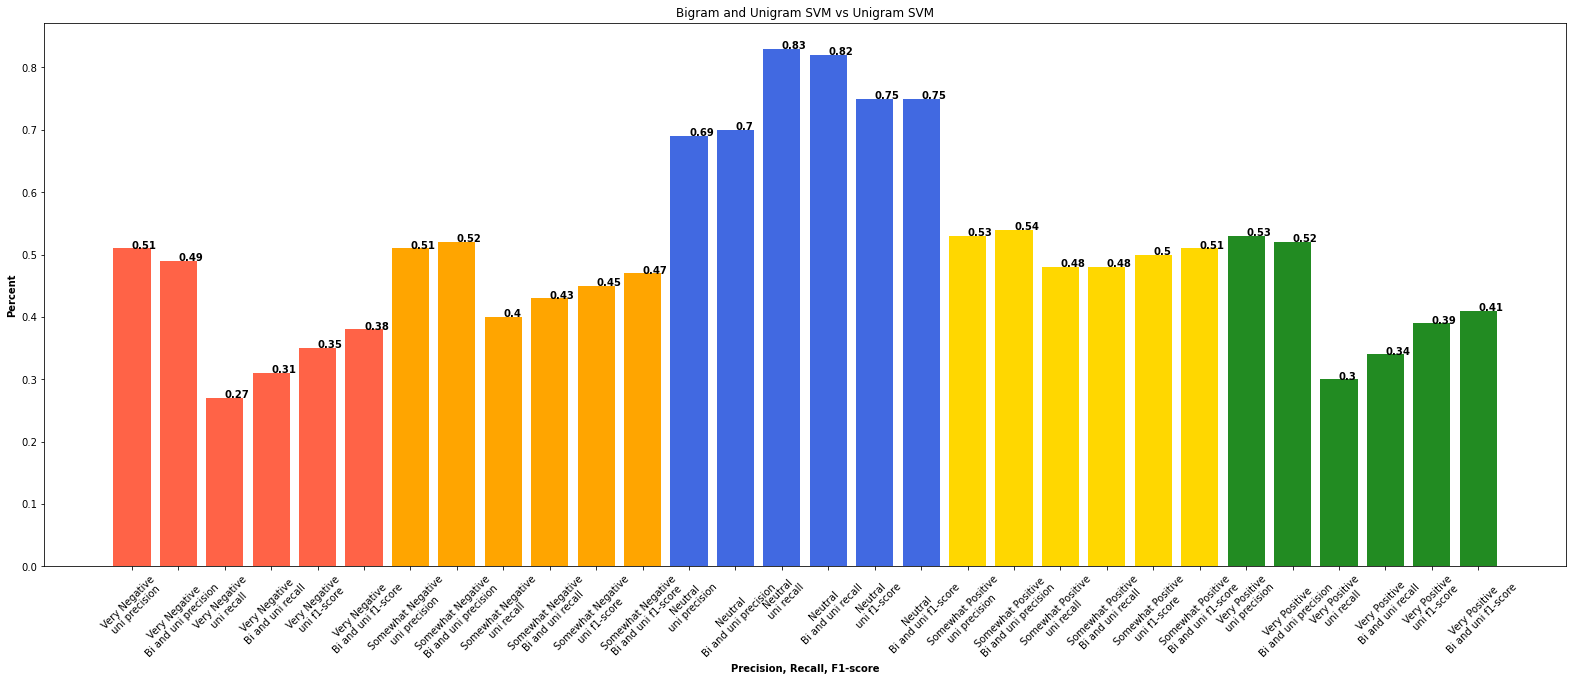

In [320]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(metics.values())
names = list(metics.keys())
colors = ['tomato','tomato','tomato','tomato','tomato','tomato',
          'orange','orange','orange','orange','orange','orange',
          'royalblue','royalblue','royalblue','royalblue','royalblue','royalblue',
          'gold','gold','gold','gold','gold','gold',
          'forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen']
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )
plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Precision, Recall, F1-score')
plt.title('Bigram and Unigram SVM vs Unigram SVM')
addlabels(values)
plt.show()

# cross validation Bigram and unigram SVM

In [297]:
gram12_tfidf_vectorizer_2 = TfidfVectorizer(encoding='latin-1', ngram_range=(1,2),use_idf=True, min_df=5, stop_words='english')

In [298]:
# fitting and transforming the training data using the count vectorizer
X_train_vec_cv = gram12_tfidf_vectorizer_2.fit_transform(X)

In [299]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm3 = LinearSVC(C=1)

In [300]:
from sklearn.model_selection import cross_val_score
import numpy as np
svm_cv_scores = cross_val_score(svm3, X_train_vec_cv, y, cv=10)
#finding the overall average accuracy.
svm_cv_score = np.mean(svm_cv_scores)

print('Avg Accuracy:',svm_cv_score)

Avg Accuracy: 0.5125784954504679


In [301]:
svm_model_3 = svm3.fit(X_train_vec_cv,y)

# kaggle submission

In [302]:
z_vec = gram12_tfidf_vectorizer_2.transform(z)

In [303]:
kaggle_pred=svm_model_3.predict(z_vec)

In [304]:
# Kaggle Submission

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open(r'C:\Users\Morga\programsMG\TextMining\kaggle-sentiment\linear_SVC.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()